<a href="https://colab.research.google.com/github/Ananyakn-tech/Survey-response-score-modeling-using-demographic-and-psychometric-factors/blob/main/Survey_response_score_modeling_using_demographic_and_psychometric_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Survey response score modeling using demographic and psychometric factors**

In [ ]:
import os
os.listdir()


['.config', 'survey_response.zip', 'sample_data']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1) * 2

model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

In [ ]:
import zipfile
import os

zip_file = "survey_response.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Extracted files:")
os.listdir("dataset")


Extracted files:


['Questions.txt', 'Employee Attrition.csv']

In [ ]:
import pandas as pd

data = pd.read_csv("dataset/Employee Attrition.csv")
data.head()


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


In [ ]:
print(data.columns)


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


In [ ]:
print(data.columns)


Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


In [ ]:
# Target column (survey response score)
target = "satisfaction_level"

# Select only numeric columns as input
X = data.select_dtypes(include=['int64','float64']).drop(columns=[target])
y = data[target]


In [ ]:
X = X.fillna(X.mean())


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
import numpy as np
import pandas as pd

print(np.isnan(X_train).sum())  # Number of NaNs in X_train
print(np.isnan(y_train).sum())  # Number of NaNs in y_train

print(np.isinf(X_train).sum())  # Number of infinite values in X_train
print(np.isinf(y_train).sum())  # Number of infinite values in y_train



Emp ID                   0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dtype: int64
632
Emp ID                   0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dtype: int64
0


In [ ]:
# Keep only rows where y_train is NOT NaN
not_nan_idx = y_train.notna()

X_train = X_train[not_nan_idx]
y_train = y_train[not_nan_idx]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
# Keep only rows in test set where y_test is not NaN
not_nan_test_idx = y_test.notna()

X_test_clean = X_test[not_nan_test_idx]
y_test_clean = y_test[not_nan_test_idx]

# Predict again
y_pred = model.predict(X_test_clean)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_clean, y_pred)
mae = mean_absolute_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2 Score: {r2:.3f}")


MSE: 14939.327
MAE: 106.071
R2 Score: -260550.799


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

feature_importance


,Feature,Coefficient
1,last_evaluation,0.046290
0,Emp ID,0.014215
5,Work_accident,0.013053
6,promotion_last_5years,0.005895
3,average_montly_hours,0.001612
4,time_spend_company,-0.024389
2,number_project,-0.048943


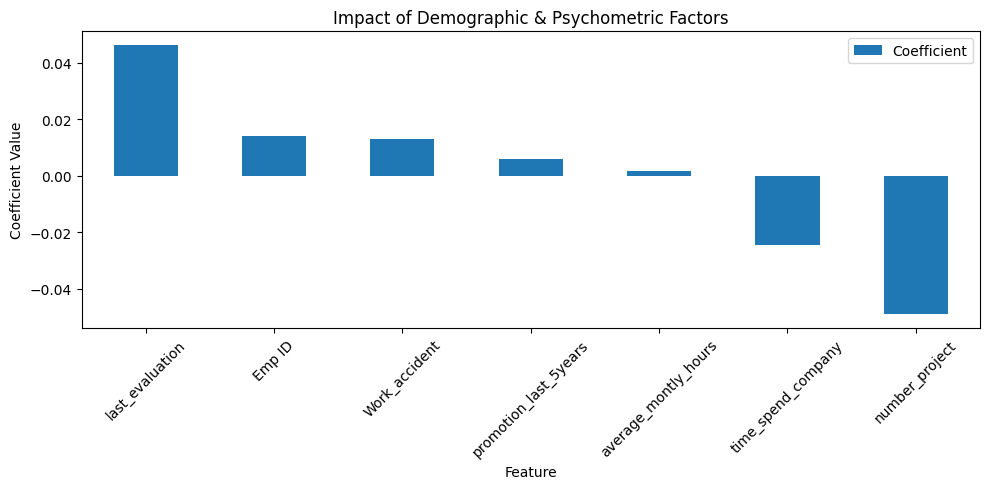

In [ ]:
import matplotlib.pyplot as plt

feature_importance.plot(
    x="Feature", y="Coefficient", kind="bar", figsize=(10,5)
)
plt.title("Impact of Demographic & Psychometric Factors")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


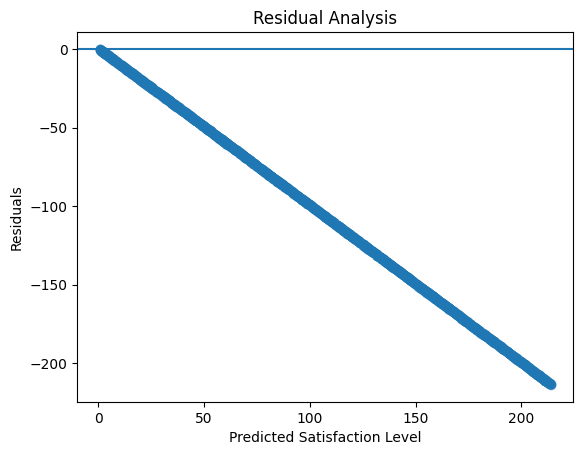

In [ ]:
residuals = y_test_clean - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicted Satisfaction Level")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


In [ ]:
not_nan_test_idx = y_test.notna()

X_test_clean = X_test[not_nan_test_idx]
y_test_clean = y_test[not_nan_test_idx]


In [ ]:
X_test_clean_scaled = scaler.transform(X_test_clean)


In [ ]:
y_pred_ridge = ridge.predict(X_test_clean_scaled)


In [ ]:
from sklearn.metrics import r2_score

print("Ridge R2 Score:", r2_score(y_test_clean, y_pred_ridge))


Ridge R2 Score: 0.058919524285527825


In [ ]:
print(len(y_test_clean), len(y_pred_ridge))


3002 3002


In [ ]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression"],
    "R2 Score": [
        r2_score(y_test_clean, y_pred),
        r2_score(y_test_clean, y_pred_ridge)
    ]
})

comparison


,Model,R2 Score
0,Linear Regression,-260550.798685
1,Ridge Regression,0.058920


In [ ]:
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

importance


,Feature,Coefficient
1,last_evaluation,0.046290
0,Emp ID,0.014215
5,Work_accident,0.013053
6,promotion_last_5years,0.005895
3,average_montly_hours,0.001612
4,time_spend_company,-0.024389
2,number_project,-0.048943


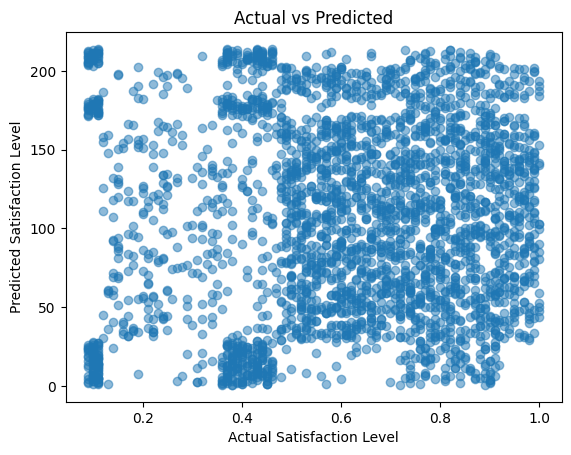

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test_clean, y_pred, alpha=0.5)
plt.xlabel("Actual Satisfaction Level")
plt.ylabel("Predicted Satisfaction Level")
plt.title("Actual vs Predicted")
plt.show()


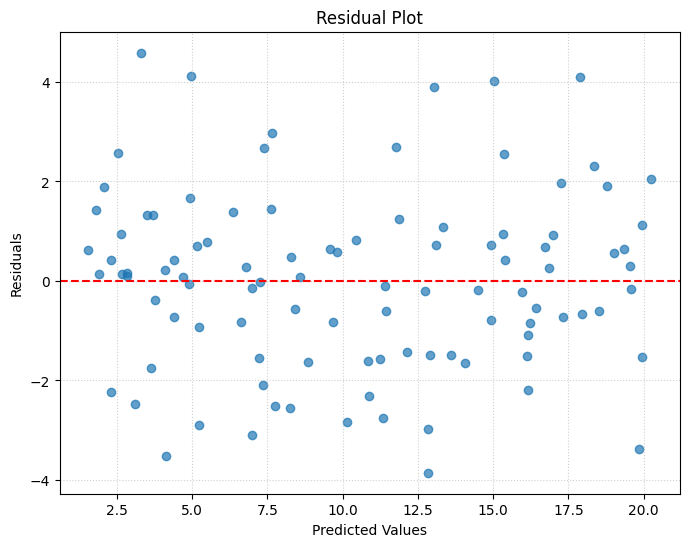

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()